# Optimzing Model Predictions

## Goal

Optimize the model prediction though different strategies if applicable:
- Handling outliers
- K-fold cross validation
- Regularization
- Non-linear models

We will start with a base model and iterate to find one that performs better.

The goal is to predict the extent of fire damage to a forest

## Data

We will use the [Forest Fires]([[https](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)) set from the UCI Machine Learning Repository. 

-  **X** : x-axis spatial coordinate within the Montesinho park map: 1 to 9
-  **Y** : y-axis spatial coordinate within the Montesinho park map: 2 to 9
-  **month** : month of the year: 'jan' to 'dec' 
-  **day** : day of the week: 'mon' to 'sun'
-  **FFMC** : FFMC index from the FWI system: 18.7 to 96.20
-  **DMC** : DMC index from the FWI system: 1.1 to 291.3 
-  **DC** : DC index from the FWI system: 7.9 to 860.6 
-  **ISI** : ISI index from the FWI system: 0.0 to 56.10
-  **temp** : temperature in Celsius degrees: 2.2 to 33.30
-   **RH** : relative humidity in %: 15.0 to 100
-   **wind** : wind speed in km/h: 0.40 to 9.40 
-   **rain** : outside rain in mm/m2 : 0.0 to 6.4 
-   **area** : the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error

## Model Development

### Load data

In [2]:
ff = pd.read_csv('data/forestfires.csv')

### EDA

In [4]:
ff.shape

(517, 13)

In [5]:
ff.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [14]:
for col in ff.columns:
    if ff[col].dtype == 'object':
        print(col,':')
        print(list(ff[col].unique()))


month :
['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan', 'dec', 'may', 'nov']
day :
['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu']


Let's check the distribution of 'area', there is a note in the dataset that says that it is really skewed.

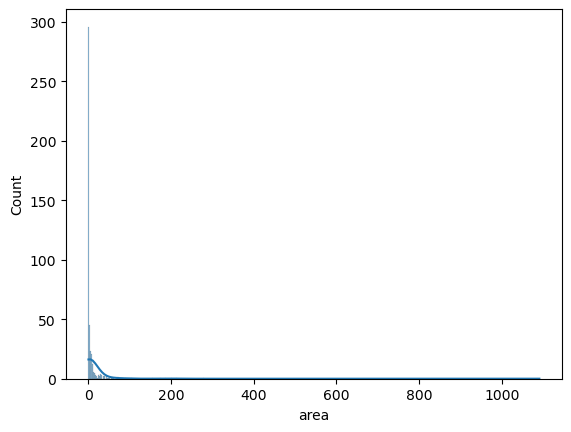

In [16]:
sns.histplot(data=ff, x='area', kde=True)
plt.show()

And did it is really skewed, and it has a big spread. We may need to keep an eye on outliers.

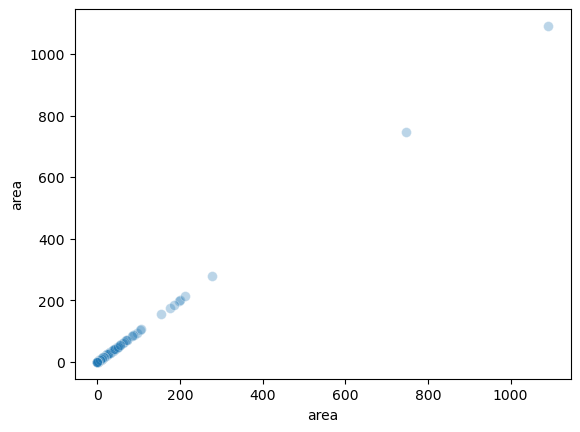

In [32]:
sns.scatterplot(data=ff, x='area', y='area', alpha=.3, s=50)
plt.show()

As the suggestion in the data says, lets apply a log to better see the spread of the data in the area column

In [42]:
ff['log_area'] = np.log1p(ff['area'])

#np.log1p() which is more robust to zeros. it adds a 1 to the value before applying the log

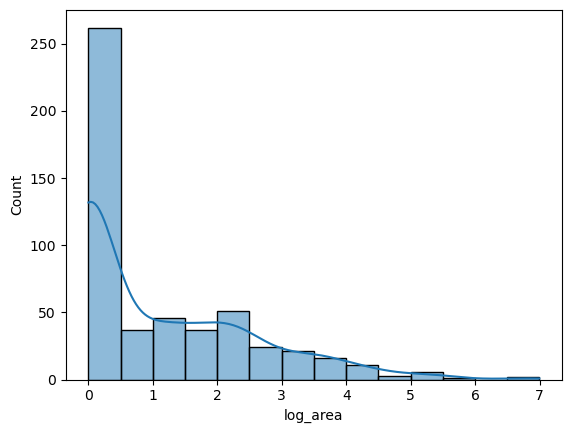

In [41]:
sns.histplot(data=ff, x='log_area', kde=True)
plt.show()

temp


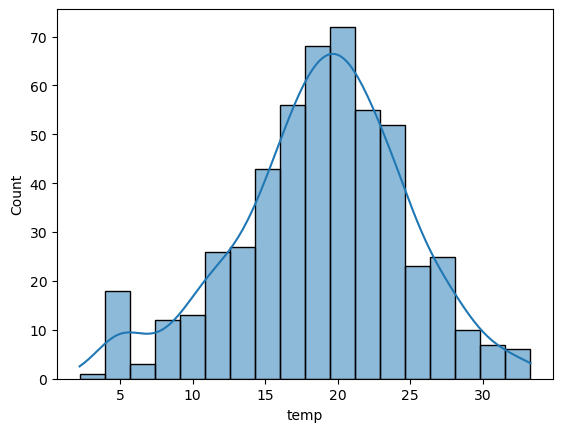

wind


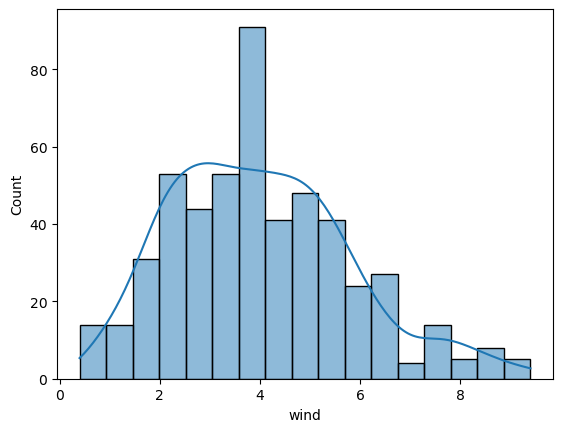

In [44]:
cols = ['temp', 'wind']

for col in cols:
    print(col)
    sns.histplot(data=ff, x=col, kde=True)
    plt.show()

#### Observations

- There's no missing data
- The target feature 'area', is skewed and the most probable is that it has outliers
  - log1p() is a good way to deal with data skewed towards 0

### Reference model

In [45]:
ref_model = LinearRegression()